### Applying PCA on both before2015 and after2015 datasets.

In PCA a new set of dimensions are constructed based on a (linear) combination of the original features. Reducing dimensionality is an important step for several reasons such as reducing complexity, improving run time, determining feature importance, visualizing class information, and last but not least preventing the curse of dimensionality.

Through PCA we will see how many principal components in both the datsets can represent our original datasets very well.

It will be useful for dimensionality reduction

In [1]:
#importing the libraries
from sklearn.decomposition import PCA 
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
#Access the stored variables
%store -r before2015
%store -r after2015
%store -r reaction

In [3]:
before2015.head(5)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
976,1,2015-12-31 08:20:00,318,7,1,318,0,0,0,0,0,2015,12,3,8
977,1,2015-12-29 06:29:00,370,16,1,370,0,0,0,0,0,2015,12,1,6
978,1,2015-12-28 03:55:00,58,3,0,58,0,0,0,0,0,2015,12,0,3
979,1,2015-12-28 03:54:00,45,0,0,45,0,0,0,0,0,2015,12,0,3
980,1,2015-12-28 03:40:00,69,0,0,69,0,0,0,0,0,2015,12,0,3


In [4]:
before2015.shape

(1659, 15)

In [5]:
after2015.head(5)

,status_type,status_published,num_reactions,num_comments,num_shares,num_likes,num_loves,num_wows,num_hahas,num_sads,num_angrys,year,month,dayofweek,hour
0,3,2018-04-22 06:00:00,529,512,262,432,92,3,1,1,0,2018,4,6,6
1,1,2018-04-21 22:45:00,150,0,0,150,0,0,0,0,0,2018,4,5,22
2,3,2018-04-21 06:17:00,227,236,57,204,21,1,1,0,0,2018,4,5,6
3,1,2018-04-21 02:29:00,111,0,0,111,0,0,0,0,0,2018,4,5,2
4,1,2018-04-18 03:22:00,213,0,0,204,9,0,0,0,0,2018,4,2,3


### Applying PCA on before2015 dataset

#### First do feature scaling 
Feature scaling is an important step before applying PCA to an dataset.

Standard scaler: [Sklearn standard scaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)

In [6]:
scaler=StandardScaler()
before2015_scaled=scaler.fit_transform(before2015[reaction])
before2015_scaled.shape

(1659, 9)

In [7]:
%store before2015_scaled

Stored 'before2015_scaled' (ndarray)


#### First fit PCA on before2015 dataset keeping number of components = 9

In [8]:
#pca = PCA(svd_solver='randomized', random_state=123)
pca=PCA()

In [9]:
transformed_data=pca.fit_transform(before2015_scaled)
transformed_data.shape

(1659, 9)

In [10]:
pca.explained_variance_ #the values are the eigen values which tell us how much variance is explained by each eigen vectors 

array([2.64732173e+00, 1.18727619e+00, 1.67814629e-01, 8.98284772e-33,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00])

In [11]:
pca.components_ #the principal components are the eigen vectors

array([[ 5.28150738e-01,  4.78008808e-01,  4.62191708e-01,
         5.28150738e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-4.69848783e-01,  5.11035615e-01,  5.45276849e-01,
        -4.69848783e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [-1.72892649e-02,  7.14387976e-01, -6.99322517e-01,
        -1.72892649e-02, -0.00000000e+00, -0.00000000e+00,
        -0.00000000e+00, -0.00000000e+00, -0.00000000e+00],
       [ 7.07106781e-01, -1.49997657e-16, -2.11719260e-18,
        -7.07106781e-01,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.000000

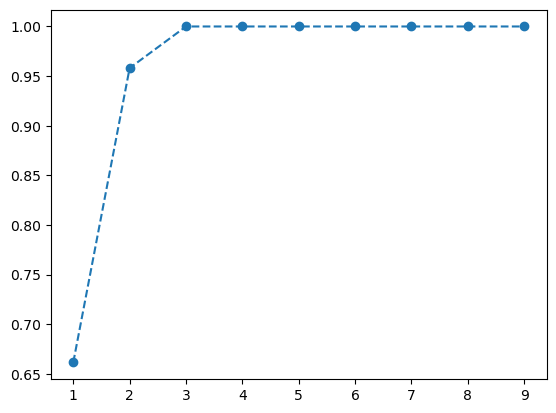

In [12]:
plt.plot(range(1,10),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle="--")

In [13]:
total_variance=sum(pca.explained_variance_)
percent_variance=[]
for i in range(len(pca.explained_variance_)):
    percent_variance.append(pca.explained_variance_[i]/total_variance)

print(percent_variance)#variance explained by each principal component

[0.6614314979366362, 0.29664013341375456, 0.041928368649609075, 2.2443582771438174e-33, 0.0, 0.0, 0.0, 0.0, 0.0]


From the eigen values and eigen vectors we can see that first four principal components explains the original data very well.

#### Now find the optimal number of principal components i.e k

We can see from graph too that first two components explain our data very well.\
Here is another way to find optimal number of components.

In [14]:
total=sum(pca.explained_variance_) # calculate the total variance across the dataset
k=0 #number of principal components
current_variance=0

#Iteratively keep adding variance across each direction in current variance and check the value of current_variance/total
while current_variance/total <= 0.95: # running PCA with 95% variance
    #print("Percentage",current_variance/total)
    current_variance += pca.explained_variance_[k]
    #print(current_variance)
    k=k+1
k
#the k value here is telling that 99% of the information can be contained in just 17 features rather than 30 orignal features

2

#### Now fit PCA on the dataset for optimal value of principal components obtained

In [15]:
pca=PCA(n_components=k)
transformed_before2015=pca.fit_transform(before2015_scaled) #will find the components

transformed_before2015.shape

(1659, 2)

In [16]:
%store transformed_before2015

Stored 'transformed_before2015' (ndarray)


#### Storing the eigen value and corresponding eigen vector in a tuple

In [17]:
principal_component_variance_pair=[]
for i in range(len(pca.explained_variance_)):
    component=pca.components_[i,:]
    principal_component_variance_pair.append((pca.explained_variance_[i],component))
principal_component_variance_pair 
principal_component_variance_pair

[(2.6473217251553205,
  array([ 0.52815074,  0.47800881,  0.46219171,  0.52815074, -0.        ,
         -0.        , -0.        , -0.        , -0.        ])),
 (1.187276191395462,
  array([-0.46984878,  0.51103561,  0.54527685, -0.46984878,  0.        ,
          0.        ,  0.        ,  0.        ,  0.        ]))]

#### Loadings
It is important to realize that the principal components are less interpretable and don’t have any real meaning since they are constructed as linear combinations of the initial variables.
But we can analyze the loadings which describe the importance of the independent variables. The loadings are from a numerical point of view, equal to the coefficients of the variables, and provide information about which variables give the largest contribution to the components.

- Loadings range from -1 to 1.
- A high absolute value (towards 1 or -1) describes that the variable strongly influences the component. Values close to 0 indicate that the variable has a weak influence on the component.
- The sign of a loading (+ or -) indicates whether a variable and a principal component are positively or negatively correlated.

In [18]:
loadings=pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1],'Feature':reaction})
loadings

,PC1,PC2,Feature
0,0.528151,-0.469849,num_reactions
1,0.478009,0.511036,num_comments
2,0.462192,0.545277,num_shares
3,0.528151,-0.469849,num_likes
4,-0.000000,0.000000,num_loves
5,-0.000000,0.000000,num_wows
6,-0.000000,0.000000,num_hahas
7,-0.000000,0.000000,num_sads
8,-0.000000,0.000000,num_angrys


We can observe that num_loves, num_wows, num_hahas, num_sads, num_angrys are all zero on both the principal axes. These faetures may not be available before 2015.

For PC1, the features which strongly influences it are num_reactions and num_likes based on their relatively highly positive values.

For PC2, the features which strongly influences it is num_shares followed by num_comments based on their relatively highly positive values.

### Applying PCA on after2015 dataset

#### Feature scaling

In [34]:
scaler=StandardScaler()
after2015_scaled=scaler.fit_transform(after2015[reaction])
after2015_scaled.shape

(5340, 9)

In [47]:
%store after2015_scaled

Stored 'after2015_scaled' (ndarray)


#### First fit PCA on after2015 dataset keeping number of components = 9

In [35]:
pca_after=PCA()
data_after=pca_after.fit_transform(after2015_scaled)
data_after.shape

(5340, 9)

In [38]:
pca_after.explained_variance_ #the values are the eigen values which tell us how much variance is explained by each eigen vectors 

array([4.14263810e+00, 1.19430187e+00, 9.07661293e-01, 8.22380909e-01,
       7.34728929e-01, 6.65869502e-01, 3.85053984e-01, 1.49051056e-01,
       5.96628488e-08])

In [39]:
pca_after.components_ #the principal components are the eigen vectors

array([[ 4.17218088e-01,  3.00013157e-01,  4.00567956e-01,
         3.76819828e-01,  4.33363203e-01,  2.98894645e-01,
         2.83640094e-01,  1.55517615e-01,  2.27363577e-01],
       [ 4.04951716e-01, -4.88555184e-01, -2.69208929e-01,
         4.69977597e-01, -1.10665243e-01,  3.24307046e-01,
        -1.48467960e-01, -3.59870642e-01, -1.87093775e-01],
       [ 1.92070971e-01, -4.93613420e-02, -1.95361849e-01,
         2.52435737e-01, -1.77195210e-01, -1.37686299e-01,
        -2.34013836e-01,  8.57231972e-01, -1.37176370e-01],
       [-1.17948159e-03, -2.69186918e-01, -1.61836051e-01,
         8.50975247e-03, -4.86278648e-02, -4.93607840e-02,
        -1.41007475e-01,  3.85983962e-02,  9.35467577e-01],
       [-1.61162633e-01, -3.98693688e-01, -2.11313464e-01,
        -2.12244032e-01,  1.08255341e-02,  3.56428669e-01,
         7.20814738e-01,  2.78470718e-01, -3.30245986e-02],
       [-2.14369994e-01, -7.69944137e-02,  2.03500919e-01,
        -2.85001671e-01,  1.35261769e-01,  7.051154

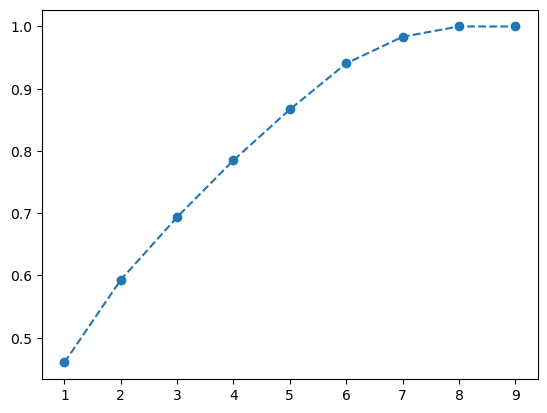

In [41]:
plt.plot(range(1,10),pca_after.explained_variance_ratio_.cumsum(),marker='o',linestyle="--")

#### Now find the optimal number of principal components i.e k
We can see from graph too that first six to seven components explain our data very well.

Here is another way to find optimal number of components.

In [42]:
total=sum(pca_after.explained_variance_) # calculate the total variance across the dataset
k=0 #number of principal components
current_variance=0

#Iteratively keep adding variance across each direction in current variance and check the value of current_variance/total
while current_variance/total < 0.95: # running PCA with 99% variance
    current_variance += pca_after.explained_variance_[k]
    k=k+1
k
#the k value here is telling that 99% of the information can be contained in just 17 features rather than 30 orignal features

7

#### Now fit PCA on the dataset for optimal value of principal components obtained

In [43]:
pca_after=PCA(n_components=k)
transformed_after2015=pca_after.fit_transform(after2015_scaled) #will find the components

pca_after.explained_variance_

array([4.1426381 , 1.19430187, 0.90766129, 0.82238091, 0.73472893,
       0.6658695 , 0.38505398])

In [44]:
%store transformed_after2015

Stored 'transformed_after2015' (ndarray)


In [48]:
transformed_after2015.shape

(5340, 7)

#### Storing the eigen value and corresponding eigen vector in a tuple

In [45]:
principal_component_variance_pair_after=[]
for i in range(len(pca_after.explained_variance_)):
    component_after=pca_after.components_[i,:]
    principal_component_variance_pair_after.append((pca_after.explained_variance_[i],component_after))
principal_component_variance_pair_after 

[(4.142638103339192,
  array([0.41721809, 0.30001316, 0.40056796, 0.37681983, 0.4333632 ,
         0.29889465, 0.28364009, 0.15551762, 0.22736358])),
 (1.194301871870339,
  array([ 0.40495172, -0.48855518, -0.26920893,  0.4699776 , -0.11066524,
          0.32430705, -0.14846796, -0.35987064, -0.18709378])),
 (0.9076612932679871,
  array([ 0.19207097, -0.04936134, -0.19536185,  0.25243574, -0.17719521,
         -0.1376863 , -0.23401384,  0.85723197, -0.13717637])),
 (0.8223809093229147,
  array([-0.00117948, -0.26918692, -0.16183605,  0.00850975, -0.04862786,
         -0.04936078, -0.14100748,  0.0385984 ,  0.93546758])),
 (0.7347289291965178,
  array([-0.16116263, -0.39869369, -0.21131346, -0.21224403,  0.01082553,
          0.35642867,  0.72081474,  0.27847072, -0.0330246 ])),
 (0.6658695015637538,
  array([-0.21436999, -0.07699441,  0.20350092, -0.28500167,  0.13526177,
          0.70511544, -0.53079676,  0.16585497, -0.02724323])),
 (0.3850539842833151,
  array([-0.00320006,  0.6357

In [46]:
loadings=pd.DataFrame({'PC1':pca_after.components_[0],'PC2':pca_after.components_[1],'Feature':reaction})
loadings

,PC1,PC2,Feature
0,0.417218,0.404952,num_reactions
1,0.300013,-0.488555,num_comments
2,0.400568,-0.269209,num_shares
3,0.376820,0.469978,num_likes
4,0.433363,-0.110665,num_loves
5,0.298895,0.324307,num_wows
6,0.283640,-0.148468,num_hahas
7,0.155518,-0.359871,num_sads
8,0.227364,-0.187094,num_angrys


- For PC1,the features which strongly influences it is num_loves followed by num_reactions and num_shares.
- FPr PC2, the features which strongly influences it is num_likes followed by num_reactions.